# Stochastic Differential Equations

### Discrete-time Stochastic Random Walk

Imagine youre in a 1D-coordinate system and flipping a coin at every timestep. If it's head, you move left (-1), if it's tale, you move right (1). Doing this for many times generates a random trajectory. After 1000 times you end up at a position somewhere between [-1000, 1000]. Here's a simulation of 10 processes done for 1000 timesteps: 

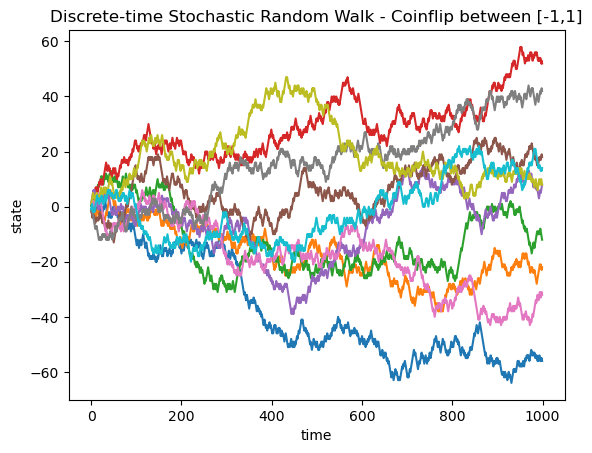

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definitions
num_processes = 10
num_steps = 1000
t = np.arange(0,num_steps,1)

for i in range(num_processes):
    # Random walk: Directions and resulting positions
    X_direction = np.random.randint(0,2,(num_steps,))*2-1
    X_state = np.cumsum(X_direction)

    # Plot results
    plt.plot(t,X_state)
    plt.title("Discrete-time Stochastic Random Walk - Coinflip between [-1,1]")
    plt.xlabel("time")
    plt.ylabel("state")

### Wiener Process / Brownian Motion

The **Wiener Process** describes a stochastic process and relates some variable - "Process" can be position (e.g. physics, brownian motion) or stock price (finance), ... . It's defined as:

$dX_t = dB_t$

* The position of particle $X_{t+\delta t}$ is normally distributed around $X_t$ with variance proportional to $\delta t$: 
  * $(X_{t+\delta t} - X_t)^2 \propto \delta t$, i.e. $X_{t+\delta t} - X_t \propto \sqrt{\delta t}$  
  * $X_{t+\delta t} = \mathcal{N}(\mu=X_t,\sigma^2=\delta t)$
* I.e. displacement of a particle $dX_t = X_{t+\delta t} - X_t$ is normally distributed around the center with 
  * $dX_t = \mathcal{N}(\mu=0,\sigma^2=\delta t)$.
* Diffusion coefficient describes how diffusive the system is

* Physics-based definition of brownian motion: Particle undergoes random collision with surrounding molecules in a fluid
  * Mean displacement of the particle: **expected mean** $\mathbf{E}(x) = 0$ at every t, but it's position is changed according to $x_t = x_{t-1} + \beta_t \cdot \sqrt{\delta t}$
  * Mean of squares of displacements: **variance** $\mathbf{E}(x^2) = (x_t - x_{t-1})^2 \propto \delta t$
* Mathematical intuition: Variance has additive properties that standard deviation doesn't - easier to work with

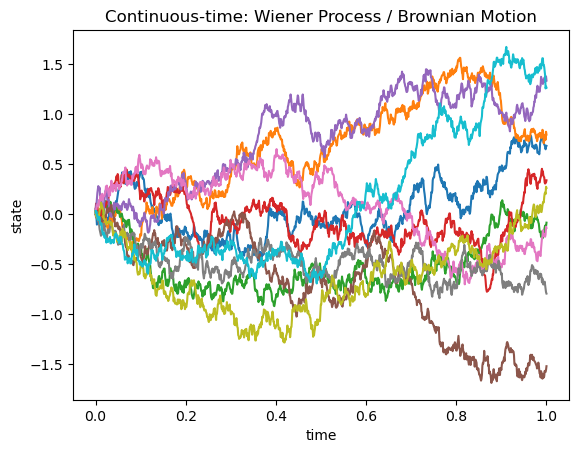

In [3]:
num_processes = 10
num_steps = 1000
t = np.linspace(0,1,num_steps)
dt = t[1]-t[0]

# X_direction = (2*np.random.rand(num_steps)-1.0)*dt
for i in range(num_processes):
    X_direction = np.random.normal(0, np.sqrt(dt), num_steps)
    X_state = np.cumsum(X_direction)

    # Plot results
    plt.plot(t,X_state)
    plt.title("Continuous-time: Wiener Process / Brownian Motion")
    plt.xlabel("time")
    plt.ylabel("state")

# Continuous time Stochastic Differential Equations (SDE) 

### Ornstein-Uhlenbeck Process

SDE is of the form:  $\mathrm{d} X_t = \mu(X_t,t)\, \mathrm{d} t + \sigma(X_t,t)\, \mathrm{d} B_t$ (Wikipedia). This basically adds a mean to the standard Brownian Motion and a variance (independently of the discretization as opposed to above).
We simulate specifically the Ornstein-Uhlenbeck process, which is often used by Score-based Generative Models (simple):

#### OU Process:

$\mathrm {d} X_{t}=\theta \cdot (\mu -X_{t})\mathrm {d} t+\sigma \mathrm {d} B_{t},\;\;X_{0}=a,$ ([Wikipedia](https://de.wikipedia.org/wiki/Ornstein-Uhlenbeck-Prozess))

#### OU Process Variables:

- $X_t$: The state (or value) of the Ornstein-Uhlenbeck process at time $t$.
- $\theta$: The rate of mean reversion. It determines how quickly the process $X_t$ reverts to the mean $\mu$.
- $\mu$: The long-term mean towards which the process reverts.
- $\sigma$: The volatility or the magnitude of the random fluctuations.
- $dW_t$: An increment of a Wiener process or Brownian motion.

#### Simulation of the OU Process Using Brownian Motion:

1. **Initialize**: Start with an initial value, $X_0$.
2. **Time Increment**: Decide on a small time increment, $\Delta t$.
3. **Brownian Motion Increment**: For each time step, generate the increment of the Brownian motion (or Wiener process), which is $\sqrt{\Delta t} \cdot Z$, where $Z$ is a standard normal random variable.
4. **Update Rule**: The OU process can be approximated in discrete time steps as: $X_{t+\Delta t} = X_t + \theta (\mu - X_t) \Delta t + \sigma \sqrt{\Delta t} Z  = X_t + \theta (\mu - X_t) \Delta t + \sigma dB_t$
1. **Repeat**: Continue the process for the desired number of steps.

Note: The term $\sigma \sqrt{\Delta t} Z$ is effectively the change in the Brownian motion over the interval $\Delta t$, so it directly introduces the Brownian motion into the simulation of the OU process.

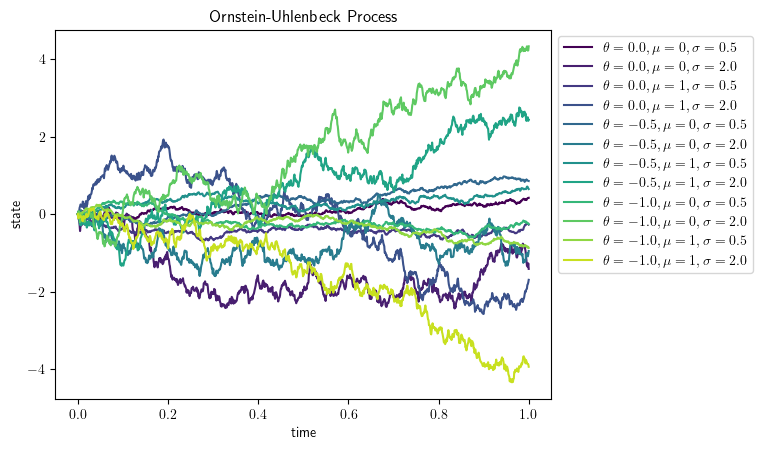

In [11]:
# We use same timesteps

import matplotlib.cm as cm
from itertools import product
from matplotlib import rc
# Set LaTeX rendering for text elements
rc('text', usetex=True)

def Bt(dt):
    # displacement = np.random.normal(0, np.sqrt(dt), num_steps)
    displacement = np.random.normal(0, np.sqrt(dt))
    return displacement

def OUt(theta, mu, sigma, xt_previous, dt):
    xt = xt_previous + theta * (mu - xt_previous) * dt + sigma * Bt(dt)
    return xt


# Difinitions
num_steps = 1000
t = np.linspace(0,1,num_steps)
dt = t[1]-t[0]

theta_list = [0.0, -0.5, -1.0] 
mu_list = [0, 1]
sigma_list = [0.5, 2.0]
x_list = []

# Create a colormap based on the colormap name
cmap_name = 'viridis'
cmap = cm.get_cmap(cmap_name)

# Simulate the stochastic process
num_plots = len(list(product(theta_list, mu_list, sigma_list)))
for idx, (theta, mu, sigma) in enumerate(product(theta_list, mu_list, sigma_list)):
    x = np.zeros_like(t)
    for i, curr_t in enumerate(range(num_steps-1)):
        x[i+1] = OUt(theta, mu, sigma, x[i], dt)
    
    color = cmap(idx / num_plots)  # Normalize i to [0, 1] for colormap
    # Plot results
    plt.plot(t,x, color=color, label=f"$\\theta={theta}, \\mu={mu}, \\sigma={sigma}$")
    plt.title("Ornstein-Uhlenbeck Process")
    plt.xlabel("time")
    plt.ylabel("state")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    idx +=1

### Special Case of OU-Process and Reverse Mode

For parameters $\theta = 1/2,\: \mu=0,\: \sigma=1$ 
([Jakiw Blog](https://jakiw.com/sgm_intro)):

\begin{align}
dX_t = -\frac{1}{2}X_t dt + dW_t, \quad X_0 \sim \mu_{data} 
\end{align}
To be able to learn the reverse process, we need a reverse SDE that provides us with the ground truth
\begin{align}
dY_t &= \frac{1}{2} Y_t dt + \nabla \log p_{T-t}(Y_t) dt + dB_t, \quad Y_0 \sim q_0
\end{align}

The marginals $p_t$, $q_t$ are snapshots of the distribution of the processes $X_t$, $Y_t$, respectively. So the distribution of $X_t$ at given time $t$ is the the marginal $p_t$, so it's basically $p_t = p(X_t)$

Examples for Marginals (in forward process):
* Finance Process: Marginal $p_t$ is the stock price at time $t$ for the process $X_t$
* Molecular Motion: Marginal $p_t$ is the position at time $t$ for the process $X_t$

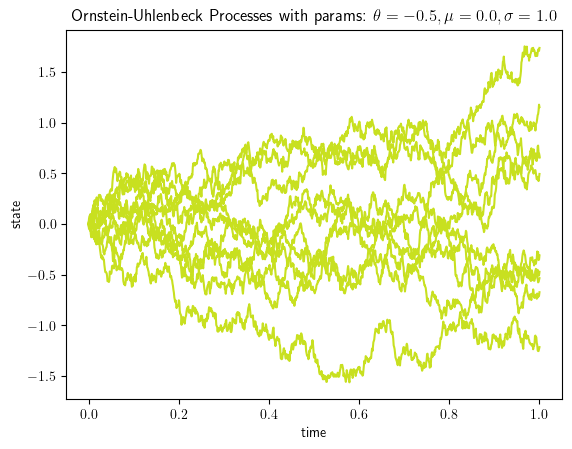

In [12]:
theta = -0.5 
mu = 0.0
sigma = 1.0

num_processes = 10
for _ in range(num_processes):
    x = np.zeros_like(t)
    for i, curr_t in enumerate(range(num_steps-1)):
        x[i+1] = OUt(theta, mu, sigma, x[i], dt)

    # Plot results
    plt.plot(t,x, color=color)
    plt.title(f"Ornstein-Uhlenbeck Processes with params: $\\theta={theta}, \\mu={mu}, \\sigma={sigma}$")
    plt.xlabel("time")
    plt.ylabel("state")
    # plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    idx +=1

Score-based Generative modeling - Score Matching with Lingevin Dynamics, paper:
[Score-based Generative Modeling through Stochastic Differential Equations](https://arxiv.org/pdf/2011.13456.pdf)
* **Langevin Dynamics**: Models motion of particle in a fluid considering both the deterministic forces acting on it (like those from external fields or gradients in potential energy) and the random forces due to thermal fluctuations (like those from collisions with the surrounding fluid molecules).
* $M\,{\ddot {\mathbf {X} }} = -\mathbf {\nabla } U(\mathbf {X} ) - \gamma \,M\,{\dot {\mathbf {X} }} + {\sqrt {2\,M\,\gamma \,k_{B}T}}\,\mathbf {R} (t)$
* Langevin dynamics is a more generalized description of Brownian motion. In the absence of the deterministic force and considering a particle with negligible inertia (i.e., $m=0$), the Langevin equation simplifies to the equation describing Brownian motion.

Advantage of Score matching: We don't need to compute the normalizing constant to fit a distribution, we just compute the score (gradient of log of distribution). 

$J(\theta) = \mathbb{E}_{x \sim p} \left\| \nabla_x \log q_\theta(x) - \nabla_x \log p(x) \right\|^2 $


Using Fisher-divergence, we don't need the score of the data distribution, but just the score of our model w.r.t. the data: 

$ J(\theta) = \mathbb{E}_{x \sim p} \left\| \nabla_x \log q_\theta(x) \right\|^2 - 2 \mathbb{E}_{x \sim p} \left[ \nabla^2_x \log q_\theta(x) \right] $

The intuition is that if the model fits the data well (some gradient and laplacian of the data), then $\nabla \log q_{\theta}(x)$ should be a good approximation of $\nabla \log p(x)$.